# COMP3115: Exploratory Data Analysis and Visualization
# Lab 6-8 Exercise on Data Classification and Regression

Student Name: YU Fengfei

Student Number: 21251215

### Q1. Import 'data_classification.csv' (x1, x2 are two features, y is the class label).  Perform 10-fold cross-validation on this dataset using SVM with linear kernel. Output the accuracy of 10-fold cross-validation on this dataset. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('data_classification.csv')
df.head()

,x1,x2,y
0,0.382609,0.983559,-1
1,0.634729,0.066417,1
2,-0.652904,0.471132,1
3,0.328349,0.383268,1
4,0.356695,-0.511327,1


In [3]:
X = df.drop(['y'], axis=1).values
y = df['y'].values

In [4]:
linear_svm_classifier = SVC(kernel='linear')
linear_cv_accuracy = cross_val_score(linear_svm_classifier, X, y, cv=10)
linear_cv_accuracy

array([0.36, 0.6 , 0.58, 0.46, 0.48, 0.48, 0.58, 0.5 , 0.54, 0.34])

### Q2. Perform 10-fold cross-validation on the dataset using SVM with 'rbf' kernel. Try different parameter settings for C = {0.01, 0.1, 1}. Output the accuracy of 10-fold cross-validation on the dataset with different values of C.

In [5]:
c_values = [0.01, 0.1, 1]
for c in c_values:
    rbf_svm_classifier = SVC(kernel='rbf', C=c)
    rbf_cv_accuracy = cross_val_score(rbf_svm_classifier, X, y, cv=10)
    print(f"CV accuracies with c={c} are: {rbf_cv_accuracy}")

CV accuracies with c=0.01 are: [0.9  0.9  0.92 0.94 0.94 0.98 0.86 0.9  0.94 0.88]
CV accuracies with c=0.1 are: [0.96 0.94 0.92 0.98 0.94 0.98 0.94 0.9  0.96 0.92]
CV accuracies with c=1 are: [0.96 0.94 0.94 1.   0.94 0.98 0.94 0.88 0.96 0.96]


### Q3. Perform 10-fold cross-validation on the dataset using multi-layers perceptron. Try different parameter settings for hidden_layer_sizes = {(50,), (100,)}. Output the accuracy of 10-fold cross-validation on the dataset with different values of hidden_layer_sizes.

In [6]:
num_layer = [50, 100]
for layer in num_layer:
    mlp_classifier = MLPClassifier(hidden_layer_sizes=(layer,), max_iter=500, activation='relu', learning_rate_init=0.01)
    cv_accuracy = cross_val_score(mlp_classifier, X, y, cv=10)
    print(f"CV accuracies with {layer}-layer MLP are: {cv_accuracy}")

CV accuracies with 50-layer MLP are: [0.98 0.92 0.94 0.98 0.9  0.98 0.96 0.9  0.96 0.94]
CV accuracies with 100-layer MLP are: [1.   0.92 0.94 0.98 0.94 0.98 0.94 0.92 0.94 0.96]


### Q4. Import 'diabetes_dataset.csv'. The output variable is the last column (i.e., column 'target'). Use 'bmi' as the only input variable and 'target' as the output variable. Perform linear regression to fit a straight to model the relationship between 'bmi' and 'target'. Visualize this two-dimensional data and the fitted straight line.  
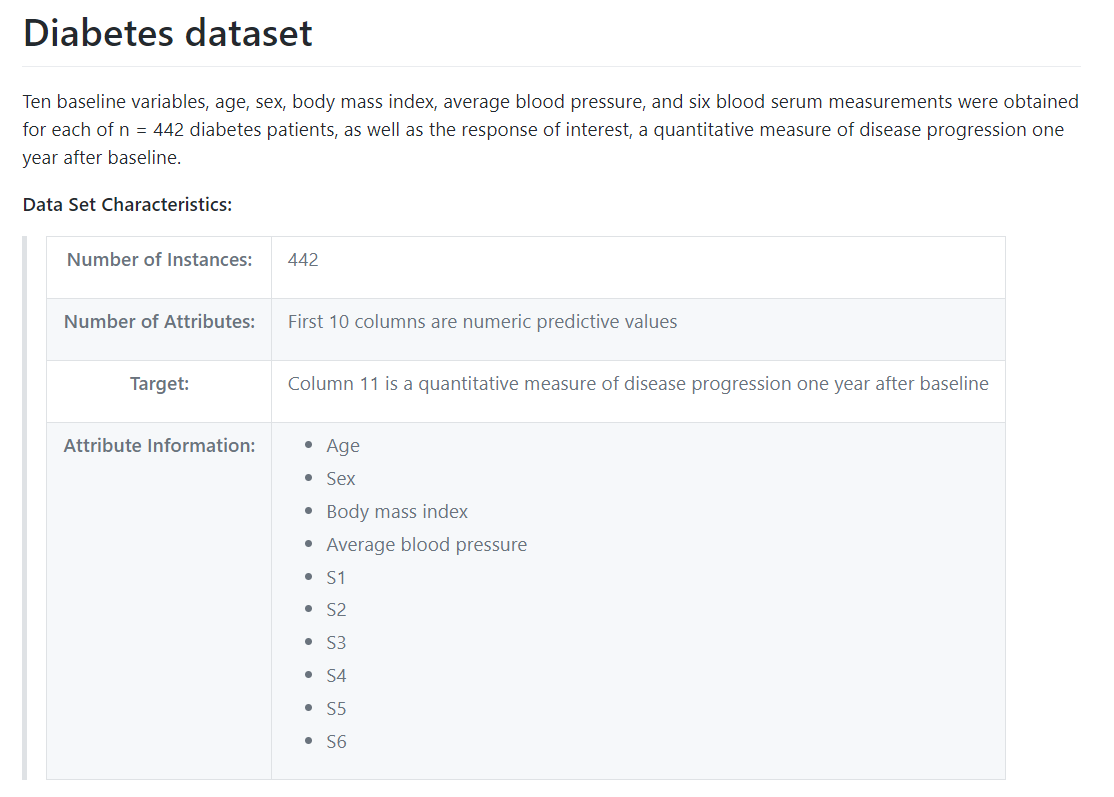

In [7]:
diabetes_df = pd.read_csv('diabetes_dataset.csv')
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [8]:
y = diabetes_df['target'].values
X = diabetes_df['bmi'].values
X = X[:, np.newaxis]

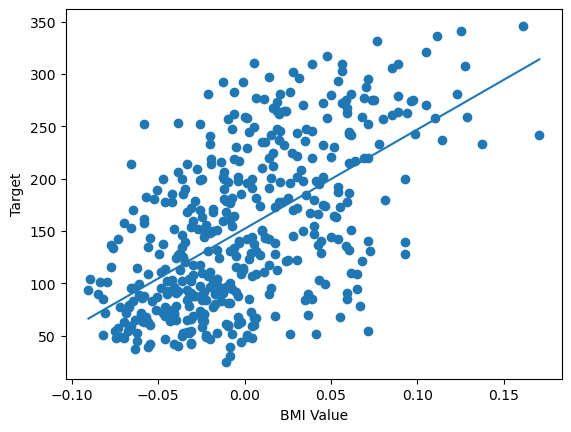

In [9]:
model = LinearRegression(fit_intercept=True)
model.fit(X, y)
xfit = np.array([X.min(), X.max()])
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(X, y)
plt.xlabel("BMI Value")
plt.ylabel("Target")
plt.plot(xfit, yfit);